<center><h1>Assignment 2</h1></center>

## Problem Statement
Implementing Feedforward neural networks with Keras and TensorFlow
1. Import the necessary packages
2. Load the training and testing data (MNIST/CIFAR10)
3. Define the network architecture using Keras
4. Train the model using SGD
5. Evaluate the network
6. Plot the training loss and accuracy

## Notebook Details
1. Author : Varad Girish Mashalkar
2. Branch : Information Technology
3. Division : BE 11
4. Batch : Q11
5. Roll Number : 43335
6. Course : Laboratory Practice 4 (Deep Learning)

## Implementation Details
1. Python version : 3.7.0
2. Tensorflow version : 2.7.0 (Compatible with CUDA11.5 and cuDNN8.6.0)

## Imports
1. numpy
2. tensorflow
3. matplotlib
4. seaborn
5. LabelBinarizer, classification_report from sklearn.preprocessing and sklearn.metrics respectively

## CIFAR dataset
1. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
2. The dataset is divided into five training batches and one test batch, each with 10000 images. 
3. The test batch contains exactly 1000 randomly-selected images from each class.
4. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. 

# 1. Importing required libraries

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as tfl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
sns.set()
%matplotlib inline

In [2]:
# Checking tensorflow version
tf.__version__

'2.7.0'

# 2. Importing the dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [4]:
# Checking the shape of data
print("Training data inputs shape  : ", train_images.shape)
print("Training data targets shape : ", train_labels.shape)
print("Testing data inputs shape   : ", test_images.shape)
print("Testing data targets shape  : ", test_labels.shape)

Training data inputs shape  :  (50000, 32, 32, 3)
Training data targets shape :  (50000, 1)
Testing data inputs shape   :  (10000, 32, 32, 3)
Testing data targets shape  :  (10000, 1)


In [5]:
# Defining list for classes
class_names = [
    'airplane', 
    'automobile', 
    'bird', 
    'cat', 
    'deer',               
    'dog', 
    'frog', 
    'horse', 
    'ship', 
    'truck'
]

# Mapping of dataset to classes
               
<table>
    <tr>
        <th>Dataset label</th>
        <th>Class name</th>
    </tr>
    <tr>
        <td>0</td>
        <td>airplane</td>
    </tr>
    <tr>
        <td>1</td>
        <td>automobile</td>
    </tr>
    <tr>
        <td>2</td>
        <td>bird</td>
    </tr>
    <tr>
        <td>3</td>
        <td>cat</td>
    </tr>
    <tr>
        <td>4</td>
        <td>deer</td>
    </tr>
    <tr>
        <td>5</td>
        <td>dog</td>
    </tr>
    <tr>
        <td>6</td>
        <td>frog</td>
    </tr>
    <tr>
        <td>7</td>
        <td>horse</td>
    </tr>
    <tr>
        <td>8</td>
        <td>ship</td>
    </tr>    
    <tr>
        <td>9</td>
        <td>truck</td>
    </tr>
</table>    

# 3. Data Analysis

### a) Checking maximum and minimum value in inputs

In [6]:
max_val = max([np.max(train_images), np.max(test_images)])
min_val = max([np.min(train_images), np.min(test_images)])
print("Maximum value : ", max_val)
print("Minimum value : ", min_val)

Maximum value :  255
Minimum value :  0


### b) Class count in training and testing sets

In [7]:
train_unique_targets, train_targets_frequency = np.unique(train_labels, return_counts=True)
test_unique_targets, test_targets_frequency = np.unique(test_labels, return_counts=True)

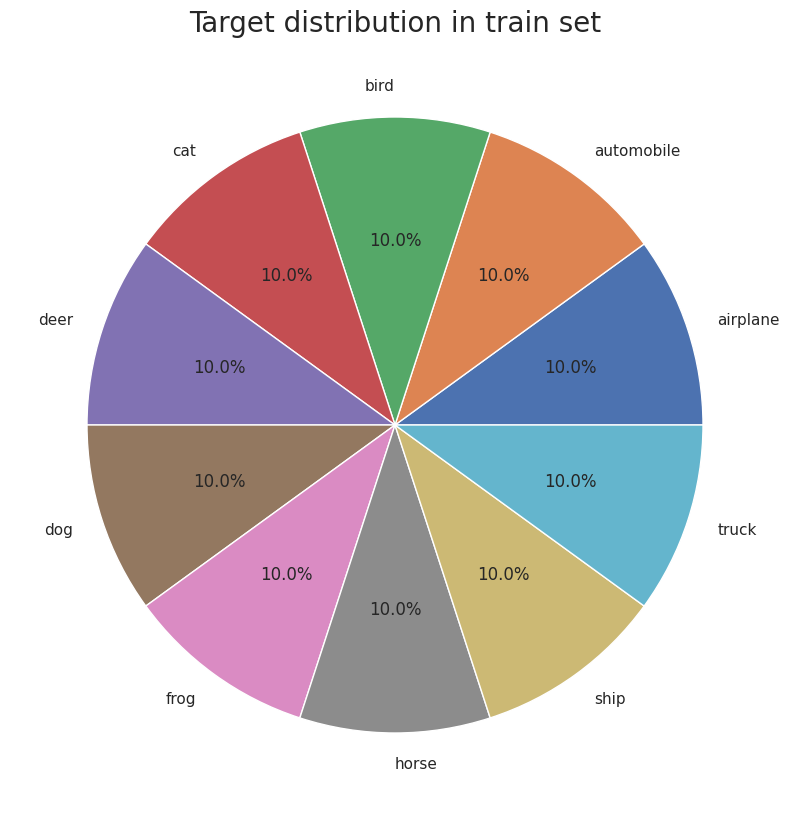

In [8]:
# Plotting pie chart for the distribution of targets in train and test sets
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.pie(
    x=train_targets_frequency,
    labels=class_names,
    autopct='%1.1f%%'
)
plt.title("Target distribution in train set", fontsize=20)
plt.show()

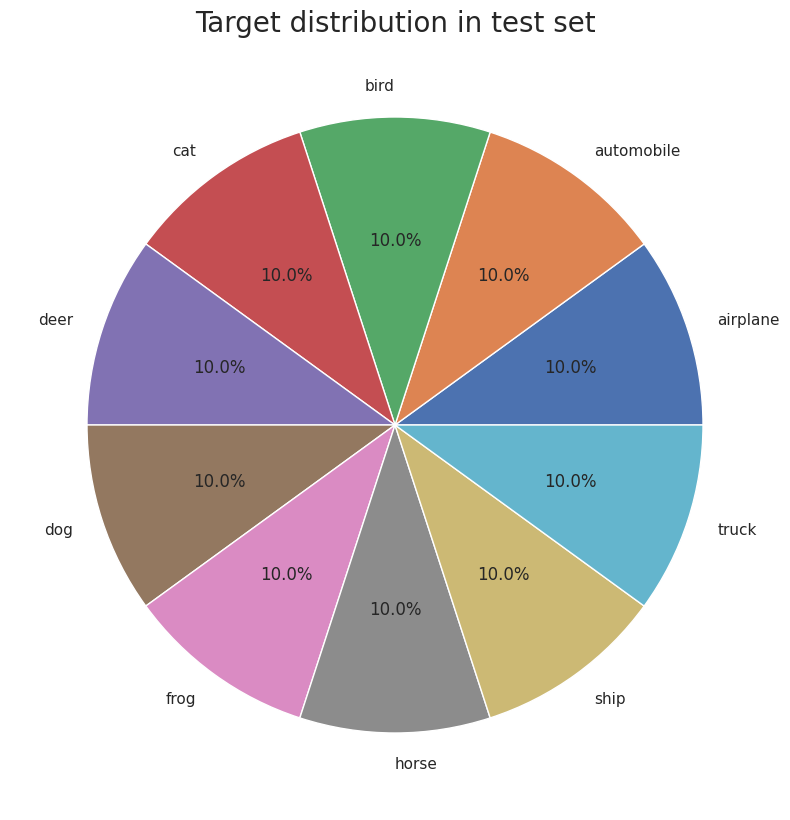

In [9]:
# Plotting pie chart for the distribution of targets in train and test sets
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.pie(
    x=test_targets_frequency,
    labels=class_names,
    autopct='%1.1f%%'
)
plt.title("Target distribution in test set", fontsize=20)
plt.show()

# Observations :

1. Maximum pixel value : 255
2. Minimum pixel value : 0
3. Number of target classes : 10 [0-9]
4. Frequency of classes in training and testing targets : 10%
5. The dataset is balanced for the number of samples for each class in training and testing dataset
6. Dataset needs to be scaled for better convergence of SGD

# 4. Viewing random data points in dataset 

In [10]:
idx = 8000

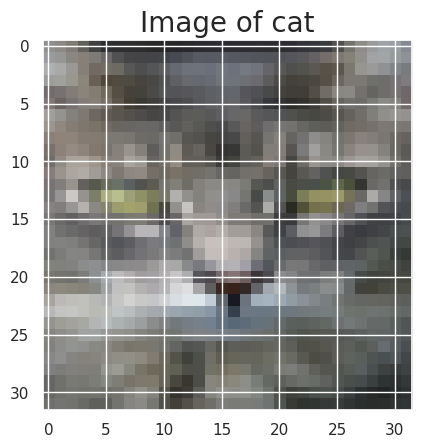

In [11]:
frame = np.float64(train_images[idx])/255
target = class_names[int(train_labels[idx])]
plt.imshow(frame)
plt.title("Image of {}".format(target), fontsize=20)
plt.show()

# 5. Data preprocessing

### a) Feature Scaling

In [12]:
# Scaling train and test inputs for a range of 0 to 1 by dividing by 255 (scalar)
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [13]:
# Confirming maximum and minimum value in dataset
max_val = max([np.max(train_images_scaled), np.max(test_images_scaled)])
min_val = max([np.min(train_images_scaled), np.min(test_images_scaled)])
print("Maximum value : ", max_val)
print("Minimum value : ", min_val)

Maximum value :  1.0
Minimum value :  0.0


### b) Image flattening

In [14]:
def flatten_image_array(image_array):
    data_points = image_array.shape[0]
    flattened_image_array = []
    for data_point in image_array:
        flattened_image = data_point.flatten()
        flattened_image_array.append(flattened_image)
    return np.vstack(flattened_image_array)

In [15]:
train_images_scaled_flattened = flatten_image_array(train_images_scaled)

In [16]:
train_images_scaled_flattened.shape

(50000, 3072)

In [17]:
test_images_scaled_flattened = flatten_image_array(test_images_scaled)

In [18]:
test_images_scaled_flattened.shape

(10000, 3072)

### c) Label binarization

In [19]:
# Defining the binarization object
lb = LabelBinarizer()

In [20]:
lb.fit(train_labels)

LabelBinarizer()

In [21]:
lb.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [22]:
# Binarizing the training and testing labels
train_labels_binarized = lb.transform(train_labels)
test_labels_binarized = lb.transform(test_labels)

In [23]:
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [24]:
train_labels_binarized[:5]

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

# 6. Model Definition

In [25]:
# Defining model architecture
model = tf.keras.models.Sequential([
    tfl.Dense(units=500, input_shape=(3072,), activation='relu'),
    tfl.Dense(units=500, activation='relu'),
    tfl.Dense(units=10, activation='softmax'),
])

2022-10-17 14:45:48.328689: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 14:45:48.771151: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 14:45:48.772035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 14:45:48.774191: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [26]:
# Compiling model
model.compile(
    optimizer='sgd', 
    metrics=['accuracy'], 
    loss='categorical_crossentropy'
)

In [27]:
# Defining Constants
BATCH_SIZE = 64
EPOCHS = 100

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               1536500   
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
Total params: 1,792,010
Trainable params: 1,792,010
Non-trainable params: 0
_________________________________________________________________


# 7. Model training

In [29]:
history = model.fit(
    x=train_images_scaled_flattened, 
    y=train_labels_binarized, 
    batch_size=BATCH_SIZE, 
    epochs=EPOCHS
)

2022-10-17 14:45:58.073766: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-10-17 14:46:01.297307: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/100
782/782 [==============================] - 10s 2ms/step - loss: 1.9068 - accuracy: 0.3196
Epoch 2/100
782/782 [==============================] - 2s 3ms/step - loss: 1.7344 - accuracy: 0.3884
Epoch 3/100
782/782 [==============================] - 2s 3ms/step - loss: 1.6538 - accuracy: 0.4181
Epoch 4/100
782/782 [==============================] - 2s 3ms/step - loss: 1.5982 - accuracy: 0.4381
Epoch 5/100
782/782 [==============================] - 2s 3ms/step - loss: 1.5547 - accuracy: 0.4532
Epoch 6/100
782/782 [==============================] - 2s 2ms/step - loss: 1.5173 - accuracy: 0.4665
Epoch 7/100
782/782 [==============================] - 2s 2ms/step - loss: 1.4846 - accuracy: 0.4787
Epoch 8/100
782/782 [==============================] - 2s 3ms/step - loss: 1.4566 - accuracy: 0.4884
Epoch 9/100
782/782 [==============================] - 2s 3ms/step - loss: 1.4319 - accuracy: 0.4963
Epoch 10/100
782/782 [==============================] - 2s 3ms/step - loss: 1.4052 - accur

# 8. Model testing

In [30]:
results = model.evaluate(test_images_scaled_flattened, test_labels_binarized, batch_size=BATCH_SIZE)

  1/157 [..............................] - ETA: 16s - loss: 1.9011 - accuracy: 0.4688

2022-10-17 14:51:10.240968: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.
2022-10-17 14:51:11.071525: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


157/157 [==============================] - 0s 2ms/step - loss: 1.9849 - accuracy: 0.4792


In [31]:
predictions = model.predict(test_images_scaled_flattened)

2022-10-17 14:51:54.383996: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


In [32]:
predictions[:5]

array([[3.4926960e-03, 1.2824108e-03, 2.1248941e-01, 1.7623237e-01,
        5.9464151e-01, 1.0285733e-02, 1.0205449e-06, 8.1857715e-06,
        8.7744050e-04, 6.8920891e-04],
       [3.8407475e-04, 1.9761053e-01, 1.5821029e-02, 2.5084188e-07,
        7.1613272e-07, 5.0853210e-08, 5.2161506e-09, 4.2591830e-05,
        5.2595401e-01, 2.6018676e-01],
       [8.0037576e-01, 1.9107925e-03, 1.6870715e-02, 7.7889426e-06,
        3.0422091e-04, 2.3622636e-06, 9.8120431e-08, 1.3052300e-03,
        1.1152331e-01, 6.7699715e-02],
       [1.1685755e-01, 5.2284909e-04, 7.4366540e-01, 7.7720464e-04,
        1.1571077e-02, 5.2061946e-06, 1.9016753e-07, 3.1345448e-04,
        1.2599190e-01, 2.9518796e-04],
       [3.4313132e-08, 1.4211897e-08, 2.3632562e-02, 2.3836615e-02,
        8.1805021e-01, 1.2180255e-03, 1.3324890e-01, 5.2048208e-06,
        8.4733929e-06, 1.2559095e-08]], dtype=float32)

In [34]:
predictions_decoded = [np.argmax(i) for i in predictions]

# 9. Generating Classification report

In [35]:
print(classification_report(test_labels, predictions_decoded))

              precision    recall  f1-score   support

           0       0.68      0.48      0.56      1000
           1       0.74      0.54      0.62      1000
           2       0.23      0.77      0.36      1000
           3       0.38      0.34      0.36      1000
           4       0.50      0.36      0.42      1000
           5       0.48      0.32      0.39      1000
           6       0.77      0.28      0.42      1000
           7       0.77      0.40      0.52      1000
           8       0.68      0.65      0.66      1000
           9       0.57      0.66      0.61      1000

    accuracy                           0.48     10000
   macro avg       0.58      0.48      0.49     10000
weighted avg       0.58      0.48      0.49     10000



# 10. Plotting training loss and accuracy over epochs

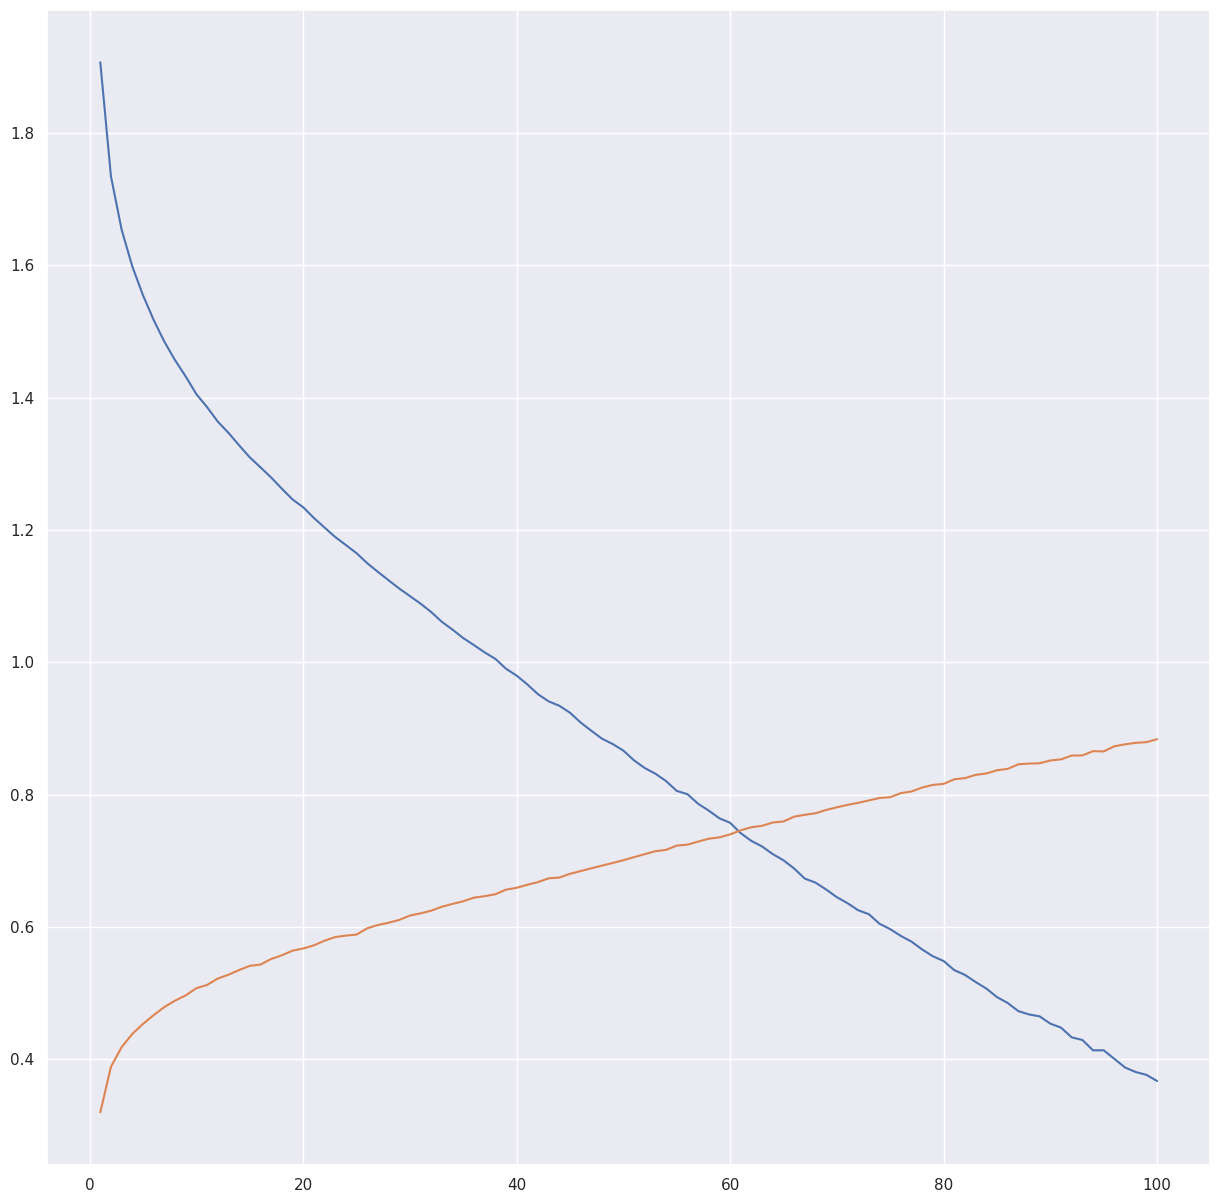

In [36]:
epochs = np.arange(1, 101)
training_loss = history.history["loss"]
training_accuracy = history.history["accuracy"]
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.plot(epochs, training_loss)
ax.plot(epochs, training_accuracy)
plt.show()

# 11. Results

1. Training data final accuracy : 88.37%
2. Testing accuracy : 47.92%

<center><h1>End of Notebook</h1></center>